# Data Collection

##### Importing pandas library for data wrangling and manipulation, and importing matplotlib and seaborn for data visualization

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading the given csv files into dataframes

In [23]:
df1=pd.read_csv('Unemployment1.csv')
df2=pd.read_csv('Unemployment2.csv')
print(df1.head())
print('2nd dataset')
print(df2.head())

           Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-01-2020         M                             5.48   
1  Andhra Pradesh  29-02-2020         M                             5.83   
2  Andhra Pradesh  31-03-2020         M                             5.79   
3  Andhra Pradesh  30-04-2020         M                            20.51   
4  Andhra Pradesh  31-05-2020         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0            16635535                                    41.02    South   
1            16545652                                    40.90    South   
2            15881197                                    39.18    South   
3            11336911                                    33.10    South   
4            12988845                                    36.46    South   

   Longitude  Latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     

##### Checking the dataset size

In [24]:
print(df1.shape)
print(df2.shape)

(267, 9)
(754, 7)


# Data Cleaning

##### Checking for NULL values
***No NULL values found in the first dataset but second dataset has 14 rows containing NULL values***

In [25]:
print(df1.isnull().sum())
print('2nd dataset')
print(df2.isnull().sum())

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
Longitude                                  0
Latitude                                   0
dtype: int64
2nd dataset
Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64


##### Checking the NULL values distribution over the dataset
***The NULL values are clustered together in a single row, so we can drop these rows***

In [26]:
df2[df2.isnull()]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
752,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Removing the NULL values from the second dataset

In [27]:
df2.dropna(inplace=True)
print(df2.shape)
print(df2.isnull().sum())

(740, 7)
Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64


##### Joining the datasets together

In [28]:
df=pd.concat([df1,df2])
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude,Area
0,Andhra Pradesh,31-01-2020,M,5.48,16635535.0,41.02,South,15.9129,79.74,NaN
1,Andhra Pradesh,29-02-2020,M,5.83,16545652.0,40.90,South,15.9129,79.74,NaN
2,Andhra Pradesh,31-03-2020,M,5.79,15881197.0,39.18,South,15.9129,79.74,NaN
3,Andhra Pradesh,30-04-2020,M,20.51,11336911.0,33.10,South,15.9129,79.74,NaN
4,Andhra Pradesh,31-05-2020,M,17.43,12988845.0,36.46,South,15.9129,79.74,NaN
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,NaN,NaN,NaN,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,NaN,NaN,NaN,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,NaN,NaN,NaN,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,NaN,NaN,NaN,Urban


##### Checking the size of the merged dataset

In [29]:
df.shape

(1007, 10)

##### Correcting the indexing

In [30]:
df.reset_index(drop=True,inplace=True)
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude,Area
0,Andhra Pradesh,31-01-2020,M,5.48,16635535.0,41.02,South,15.9129,79.74,NaN
1,Andhra Pradesh,29-02-2020,M,5.83,16545652.0,40.90,South,15.9129,79.74,NaN
2,Andhra Pradesh,31-03-2020,M,5.79,15881197.0,39.18,South,15.9129,79.74,NaN
3,Andhra Pradesh,30-04-2020,M,20.51,11336911.0,33.10,South,15.9129,79.74,NaN
4,Andhra Pradesh,31-05-2020,M,17.43,12988845.0,36.46,South,15.9129,79.74,NaN
...,...,...,...,...,...,...,...,...,...,...
1002,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,NaN,NaN,NaN,Urban
1003,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,NaN,NaN,NaN,Urban
1004,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,NaN,NaN,NaN,Urban
1005,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,NaN,NaN,NaN,Urban


##### Checking for NULL values in the merged dataset

In [31]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,740
Longitude,740
Latitude,740
Area,267


##### Removing the unwanted columns

In [32]:
df.drop(['Region.1','Frequency','Longitude','Latitude','Area'],axis=1,inplace=True)
df

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,31-01-2020,5.48,16635535.0,41.02
1,Andhra Pradesh,29-02-2020,5.83,16545652.0,40.90
2,Andhra Pradesh,31-03-2020,5.79,15881197.0,39.18
3,Andhra Pradesh,30-04-2020,20.51,11336911.0,33.10
4,Andhra Pradesh,31-05-2020,17.43,12988845.0,36.46
...,...,...,...,...,...
1002,West Bengal,29-02-2020,7.55,10871168.0,44.09
1003,West Bengal,31-03-2020,6.67,10806105.0,43.34
1004,West Bengal,30-04-2020,15.63,9299466.0,41.20
1005,West Bengal,31-05-2020,15.22,9240903.0,40.67


##### Checking for NULL after removing the unwanted columns
***No NULL values found, dataset is cleaned***

In [33]:
df.isnull().sum()

,0
Region,0
Date,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0


# Data Preparation

##### Converting the Date column into datetime(yyyy-mm-dd) format

In [34]:
df['Date']=pd.to_datetime(df['Date'])
df

<ipython-input-34-bab02b130290>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])


,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,2020-01-31,5.48,16635535.0,41.02
1,Andhra Pradesh,2020-02-29,5.83,16545652.0,40.90
2,Andhra Pradesh,2020-03-31,5.79,15881197.0,39.18
3,Andhra Pradesh,2020-04-30,20.51,11336911.0,33.10
4,Andhra Pradesh,2020-05-31,17.43,12988845.0,36.46
...,...,...,...,...,...
1002,West Bengal,2020-02-29,7.55,10871168.0,44.09
1003,West Bengal,2020-03-31,6.67,10806105.0,43.34
1004,West Bengal,2020-04-30,15.63,9299466.0,41.20
1005,West Bengal,2020-05-31,15.22,9240903.0,40.67


##### Dividing the datasets into pre-covid and during-covid times

In [35]:
covid_start_date='2020-03-01'
pre_covid_df=df[df['Date']<covid_start_date]
during_covid_df= df[df['Date']>=covid_start_date]
print(pre_covid_df)
print('During Covid')
print(during_covid_df)

              Region       Date  Estimated Unemployment Rate (%)  \
0     Andhra Pradesh 2020-01-31                             5.48   
1     Andhra Pradesh 2020-02-29                             5.83   
10             Assam 2020-01-31                             4.66   
11             Assam 2020-02-29                             4.41   
20             Bihar 2020-01-31                            10.61   
...              ...        ...                              ...   
998      West Bengal 2019-10-31                             7.83   
999      West Bengal 2019-11-30                             6.61   
1000     West Bengal 2019-12-31                             7.24   
1001     West Bengal 2020-01-31                             7.27   
1002     West Bengal 2020-02-29                             7.55   

      Estimated Employed  Estimated Labour Participation Rate (%)  
0             16635535.0                                    41.02  
1             16545652.0                       

# Data Analysis

##### plotting a boxplot for visualizing the pre and during-covid unemployment rate

### Detailed Analysis:-
1. In most regions, the unemployment rate during COVID-19 (orange bars) is higher compared to the pre-COVID period (blue bars). This indicates a general increase in unemployment rates due to the pandemic.
2. Certain regions like Bihar, Jharkhand, Puducherry and Tamil Nadu show a substantial increase in unemployment rates during the COVID-19 period compared to others.
3. Regions like Assam, Chattisgarh and Meghalaya show a moderate increase in unemployment rates, indicating that while there was an impact, it was not as severe as in other regions.
4. Regions like Chandigarh, Jammu and Kashmir and Tripura's unemployment rates weren't affected during Covid-19


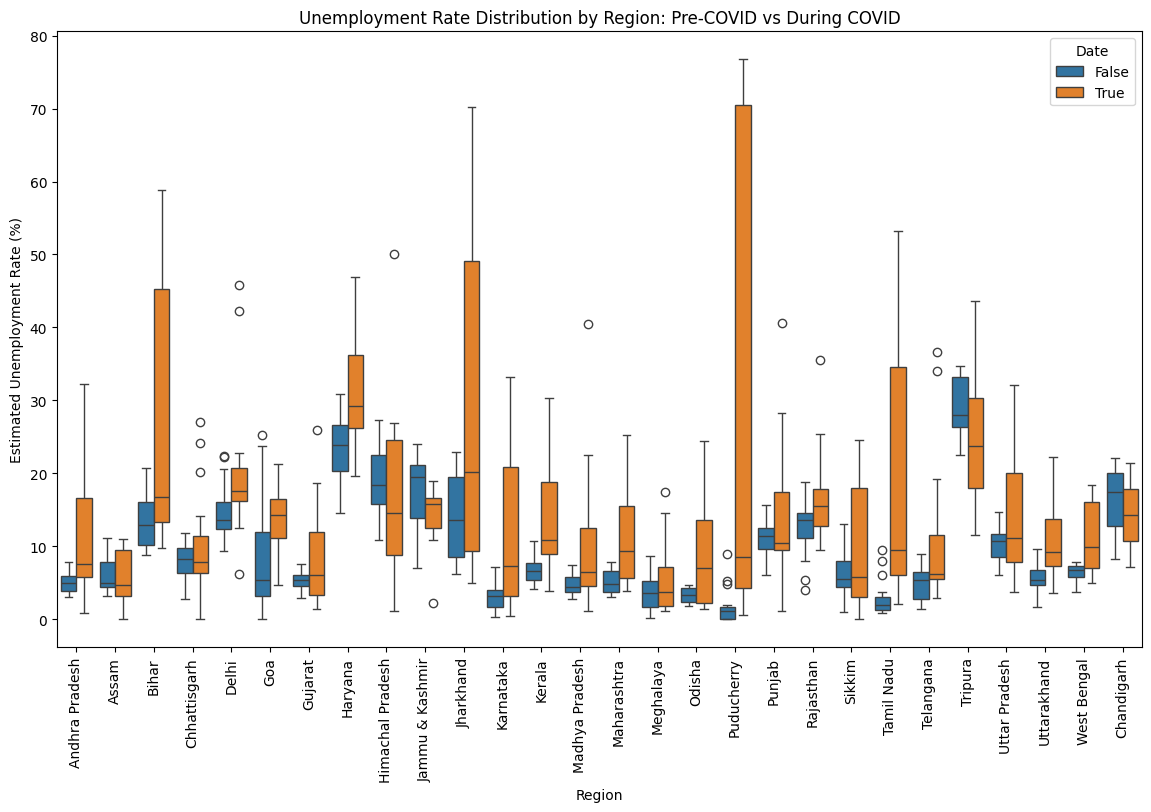

In [36]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df, hue=df['Date'] >= covid_start_date)
plt.xticks(rotation=90)
plt.title('Unemployment Rate Distribution by Region: Pre-COVID vs During COVID')
plt.legend(title='Date')
plt.show()

##### generating the summary of the two datasets for better understanding

### Detailed Analysis:-
1. The average unemployment rate increased significantly during COVID-19 (mean of 15.30%) compared to pre-COVID (mean of 9.84%).
2. The maximum unemployment rate observed during COVID-19 (76.74%) is much higher than the pre-COVID maximum (34.69%).
3. The standard deviation of the unemployment rate during COVID-19 (13.48%) is almost double that of the pre-COVID period (7.35%), indicating more variability and fluctuations during the pandemic.

In [37]:
print("Pre-COVID Summary:")
print(pre_covid_df.describe())
print("\nDuring COVID Summary:")
print(during_covid_df.describe())

Pre-COVID Summary:
                                Date  Estimated Unemployment Rate (%)  \
count                            588                       588.000000   
mean   2019-10-25 21:15:55.102040832                         9.484932   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-07-31 00:00:00                         4.290000   
50%              2019-10-31 00:00:00                         7.110000   
75%              2020-01-31 00:00:00                        12.662500   
max              2020-02-29 00:00:00                        34.690000   
std                              NaN                         7.353400   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count        5.880000e+02                               588.000000  
mean         8.182063e+06                                43.931888  
min          8.797400e+04                                26.330000  
25%          1.582634e+06                      